In [1]:
# Author: Arthur Prigent
# Email: aprigent@ictp.it

In [1]:
from load_librairies import *
from scipy.stats.stats import pearsonr
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy
%matplotlib inline 
def nandetrend(y):
    ''' Remove the linear trend from the data '''
    
    x = np.arange(0,y.shape[0],1)
    m, b, r_val, p_val, std_err = stats.linregress(x,np.array(y))
    y_detrended= np.array(y) - m*x
    return y_detrended


def is_jja(month):
    return (month>=6) & (month<=8)


dir_proj = '/home/netapp-clima-users/users/aprigent/Projects/TAV_OMIP/'
path_fig = dir_proj+'/figures_final/'


dir_tos_omip1 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip1/tos/mon/'
dir_tos_omip2 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip2/tos/mon/'



#dir_obs_sst = '/home/netapp-clima-users/users/aprigent/Observations/HadI-SST/'
dir_obs_sst = '/home/netapp-clima-users/users/aprigent/Observations/'


path_data_out = '/media/aprigent/Arthur_disk/data_uncertainty/'



period_str = 1985
period_end = 2004



/tmp/ipykernel_10049/1326160831.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


# Load data ORA-S5
 - /TAV_OMIP/scripts/processing/prepare_BF1_ORAS5.ipynb
 - /TAV_OMIP/scripts/processing/prepare_BF2_ORAS5.ipynb
 - /TAV_OMIP/scripts/processing/prepare_BF3_ORAS5.ipynb

In [2]:
bf1_oras5 = xr.open_dataset(path_data_out+'BF1_oras5_atl_1985_2004_new_mjj.nc')
bf2_oras5 = xr.open_dataset(path_data_out+'BF2_oras5_atl_1985_2004_new_mjj.nc')
bf3_oras5 = xr.open_dataset(path_data_out+'BF3_oras5_atl_1985_2004_new_mjj.nc')




TD_oras5 = xr.open_dataset(path_data_out+'TD_oras5_atl_1985_2004_new_mjj.nc')
TD_omip1_atl = xr.open_dataset(path_data_out+'TD_omip1_atl_1985_2004_new_mjj_cycle5.nc')
TD_omip2_atl = xr.open_dataset(path_data_out+'TD_omip2_atl_1985_2004_new_mjj.nc')

# Load data OMIP

 - /TAV_OMIP/scripts/processing/prepare_BF1_omip1.ipynb
 - /TAV_OMIP/scripts/processing/prepare_BF1_omip2.ipynb
 - /TAV_OMIP/scripts/processing/prepare_BF2_omip1.ipynb
 - /TAV_OMIP/scripts/processing/prepare_BF2_omip2.ipynb
 - /TAV_OMIP/scripts/processing/prepare_BF3_omip1.ipynb

In [4]:
## BF1 ##
bf1_omip1 = xr.open_dataset(path_data_out+'BF1_omip1_atl_1985_2004_new_mjj_cycle5.nc')
bf1_omip2 = xr.open_dataset(path_data_out+'BF1_omip2_atl_1985_2004_new_mjj.nc')

## BF2 ##
bf2_omip1 = xr.open_dataset(path_data_out+'BF2_omip1_atl_1985_2004_new_mjj_cycle5.nc')
bf2_omip2 = xr.open_dataset(path_data_out+'BF2_omip2_atl_1985_2004_new_mjj.nc')



## BF3 ##
bf3_omip1 = xr.open_dataset(path_data_out+'BF3_omip1_atl_1985_2004_new_mjj_cycle5.nc')
bf3_omip2 = xr.open_dataset(path_data_out+'BF3_omip2_atl_1985_2004_new_mjj.nc')

# Figure 6

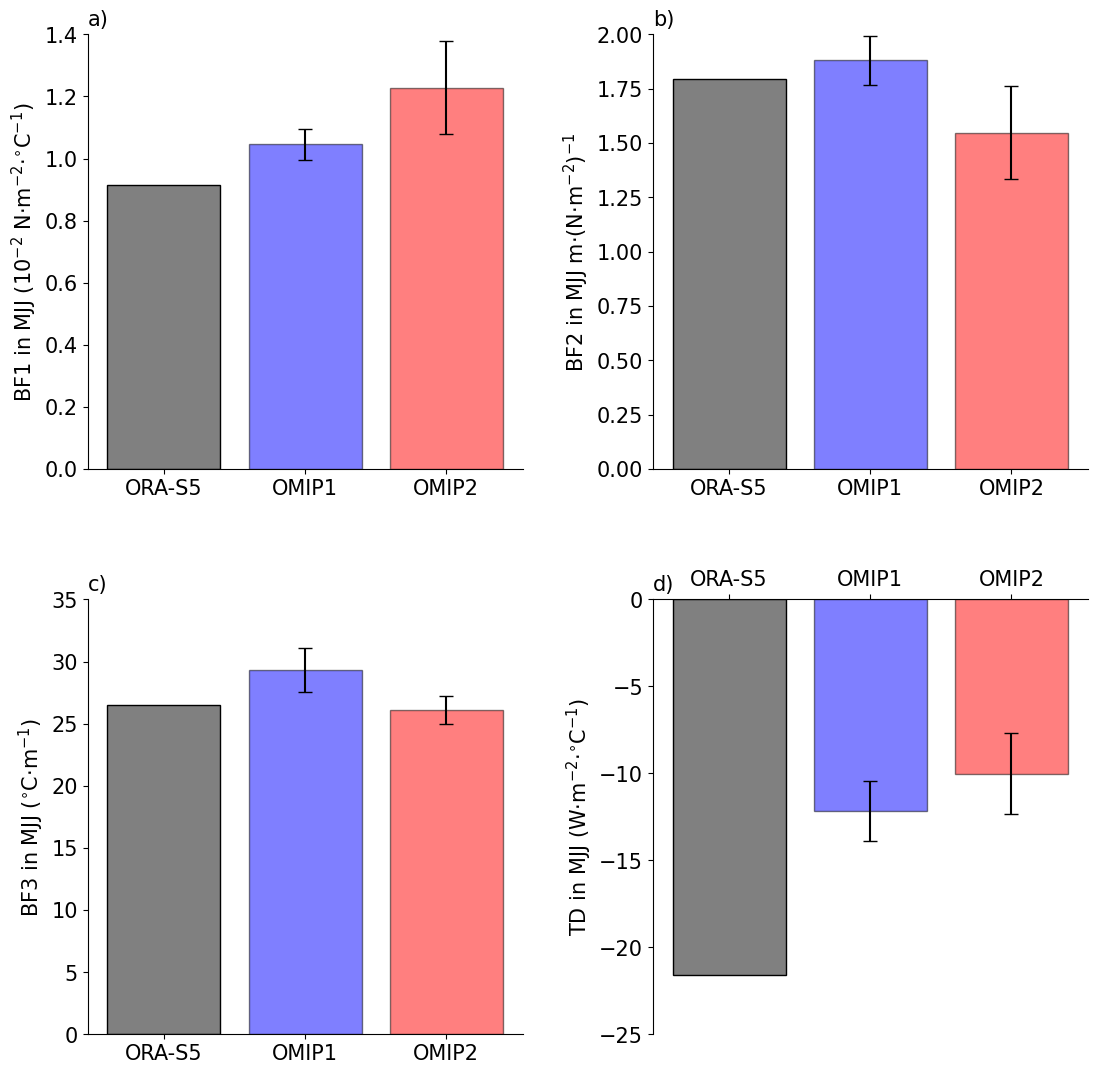

In [8]:
f,ax = plt.subplots(2,2,figsize=[10,10])
f.patch.set_facecolor('white')
ftz=15
ax=ax.ravel()
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.3, wspace=0.3)
ax[0].bar('ORA-S5',bf1_oras5.alpha_atl3*100,color='grey',edgecolor='black')

ax[0].bar('OMIP1',bf1_omip1.alpha_atl3.mean(dim='model')*100,color='blue',edgecolor='black',alpha=0.5)
ax[0].errorbar('OMIP1',bf1_omip1.alpha_atl3.mean(dim='model')*100,
               yerr=bf1_omip1.alpha_atl3.std(dim='model')*100,color='black',capsize=5)


ax[0].set_ylabel('BF1 in MJJ (10$^{-2}$ N$\cdot$m$^{-2}$$\cdot$$^{\circ}$C$^{-1}$)',fontsize=ftz)
ax[0].bar('OMIP2',bf1_omip2.alpha_atl3.mean(dim='model')*100,color='red',edgecolor='black',alpha=0.5)
ax[0].errorbar('OMIP2',bf1_omip2.alpha_atl3.mean(dim='model')*100,
               yerr=bf1_omip2.alpha_atl3.std(dim='model')*100,color='black',capsize=5)
ax[0].tick_params(labelsize=ftz)
ax[0].spines[['right','top']].set_visible(False)

ax[0].set_ylim([0,1.4])



ax[1].bar('ORA-S5',bf2_oras5.alpha_atl3,color='grey',edgecolor='black')
ax[1].bar('OMIP1',bf2_omip1.alpha_atl3.mean(dim='model'),color='blue',edgecolor='black',alpha=0.5)
ax[1].errorbar('OMIP1',bf2_omip1.alpha_atl3.mean(dim='model'),yerr=bf2_omip1.alpha_atl3.std(dim='model'),color='black',capsize=5)
ax[1].set_ylabel('BF2 in MJJ m$\cdot$(N$\cdot$m$^{-2}$)$^{-1}$',fontsize=ftz)
ax[1].bar('OMIP2',bf2_omip2.alpha_atl3.mean(dim='model'),color='red',edgecolor='black',alpha=0.5)
ax[1].errorbar('OMIP2',bf2_omip2.alpha_atl3.mean(dim='model'),yerr=bf2_omip2.alpha_atl3.std(dim='model'),color='black',capsize=5)
ax[1].tick_params(labelsize=ftz)
ax[1].spines[['right','top']].set_visible(False)
ax[1].set_ylim([0,2])


ax[2].bar('ORA-S5',bf3_oras5.alpha_atl3,color='grey',edgecolor='black')
ax[2].bar('OMIP1',bf3_omip1.alpha_atl3.mean(dim='model'),color='blue',edgecolor='black',alpha=0.5)
ax[2].errorbar('OMIP1',bf3_omip1.alpha_atl3.mean(dim='model'),yerr=bf3_omip1.alpha_atl3.std(dim='model'),color='black',capsize=5)
ax[2].set_ylabel('BF3 in MJJ ($^{\circ}$C$\cdot$m$^{-1}$)',fontsize=ftz)
ax[2].bar('OMIP2',bf3_omip2.alpha_atl3.mean(dim='model'),color='red',edgecolor='black',alpha=0.5)
ax[2].errorbar('OMIP2',bf3_omip2.alpha_atl3.mean(dim='model'),yerr=bf3_omip2.alpha_atl3.std(dim='model'),color='black',capsize=5)
ax[2].tick_params(labelsize=ftz,labelbottom=True,labeltop=False,labelleft=True,labelright=False,
                 bottom=True,top=False,left=True,right=False)
ax[2].spines[['right','top']].set_visible(False)
ax[2].set_ylim([0,35])




ax[3].bar('ORA-S5',TD_oras5.alpha_atl3,color='grey',edgecolor='black')
ax[3].bar('OMIP1',TD_omip1_atl.alpha_atl3.mean(dim='model'),color='blue',edgecolor='black',alpha=0.5)
ax[3].errorbar('OMIP1',TD_omip1_atl.alpha_atl3.mean(dim='model'),
               yerr=TD_omip1_atl.alpha_atl3.std(dim='model'),color='black',capsize=5)
ax[3].set_ylabel('TD in MJJ (W$\cdot$m$^{-2}$$\cdot$$^{\circ}$C$^{-1}$)',fontsize=ftz)
ax[3].bar('OMIP2',TD_omip2_atl.alpha_atl3.mean(dim='model'),color='red',edgecolor='black',alpha=0.5)
ax[3].errorbar('OMIP2',TD_omip2_atl.alpha_atl3.mean(dim='model'),yerr=TD_omip2_atl.alpha_atl3.std(dim='model'),color='black',capsize=5)
ax[3].tick_params(labelsize=ftz,labelbottom=False,labeltop=True,labelleft=True,labelright=False,
                 bottom=False,top=True,left=True,right=False)
ax[3].spines[['right','bottom']].set_visible(False)
ax[3].set_ylim([-25,0])




ax[0].text(0,1.02,'a)',transform=ax[0].transAxes,size=ftz)
ax[1].text(0,1.02,'b)',transform=ax[1].transAxes,size=ftz)
ax[2].text(0,1.02,'c)',transform=ax[2].transAxes,size=ftz)
ax[3].text(0,1.02,'d)',transform=ax[3].transAxes,size=ftz)

plt.savefig(path_fig+'figure_06.png',bbox_inches='tight',dpi=300)

# Values for the paper BF section

In [6]:
print('BF1 ORA-S5 MJJ = ',np.round(bf1_oras5.alpha_atl3.values*100,2))

print('BF1 OMIP1 MJJ = ',np.round(bf1_omip1.alpha_atl3.mean(dim='model').values*100,2),'+/-',
      np.round(bf1_omip1.alpha_atl3.std(dim='model').values*100,2))

print('BF1 OMIP2 MJJ = ',np.round(bf1_omip2.alpha_atl3.mean(dim='model').values*100,2),'+/-',
      np.round(bf1_omip2.alpha_atl3.std(dim='model').values*100,2))

print(' ')


print('BF2 ORA-S5 MJJ = ',np.round(bf2_oras5.alpha_atl3.values,2))

print('BF2 OMIP1 MJJ = ',np.round(bf2_omip1.alpha_atl3.mean(dim='model').values,2),'+/-',
      np.round(bf2_omip1.alpha_atl3.std(dim='model').values,2))

print('BF2 OMIP2 MJJ = ',np.round(bf2_omip2.alpha_atl3.mean(dim='model').values,2),'+/-',
      np.round(bf2_omip2.alpha_atl3.std(dim='model').values,2))

print(' ')


print('BF3 ORA-S5 MJJ = ',np.round(bf3_oras5.alpha_atl3.values,2))

print('BF3 OMIP1 MJJ = ',np.round(bf3_omip1.alpha_atl3.mean(dim='model').values,2),'+/-',
      np.round(bf3_omip1.alpha_atl3.std(dim='model').values,2))

print('BF3 OMIP2 MJJ = ',np.round(bf3_omip2.alpha_atl3.mean(dim='model').values,2),'+/-',
      np.round(bf3_omip2.alpha_atl3.std(dim='model').values,2))

print(' ')

print('TD ORA-S5 MJJ = ',np.round(TD_oras5.alpha_atl3.values,2))

print('TD OMIP1 MJJ = ',np.round(TD_omip1_atl.alpha_atl3.mean(dim='model').values,2),'+/-',
      np.round(TD_omip1_atl.alpha_atl3.std(dim='model').values,2))

print('TD OMIP2 MJJ = ',np.round(TD_omip2_atl.alpha_atl3.mean(dim='model').values,2),'+/-',
      np.round(TD_omip2_atl.alpha_atl3.std(dim='model').values,2))

print(' ')

BF1 ORA-S5 MJJ =  0.91
BF1 OMIP1 MJJ =  1.05 +/- 0.05
BF1 OMIP2 MJJ =  1.23 +/- 0.15
 
BF2 ORA-S5 MJJ =  1.79
BF2 OMIP1 MJJ =  1.88 +/- 0.11
BF2 OMIP2 MJJ =  1.55 +/- 0.21
 
BF3 ORA-S5 MJJ =  26.51
BF3 OMIP1 MJJ =  29.34 +/- 1.8
BF3 OMIP2 MJJ =  26.1 +/- 1.1
 
TD ORA-S5 MJJ =  -21.58
TD OMIP1 MJJ =  -12.18 +/- 1.72
TD OMIP2 MJJ =  -10.02 +/- 2.34
 


# Figure 6

/home/netapp-clima/users/ggiulian/m20/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/netapp-clima/users/ggiulian/m20/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/netapp-clima/users/ggiulian/m20/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/netapp-clima/users/ggiulian/m20/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_lab

Text(0, 1.03, 'i)')

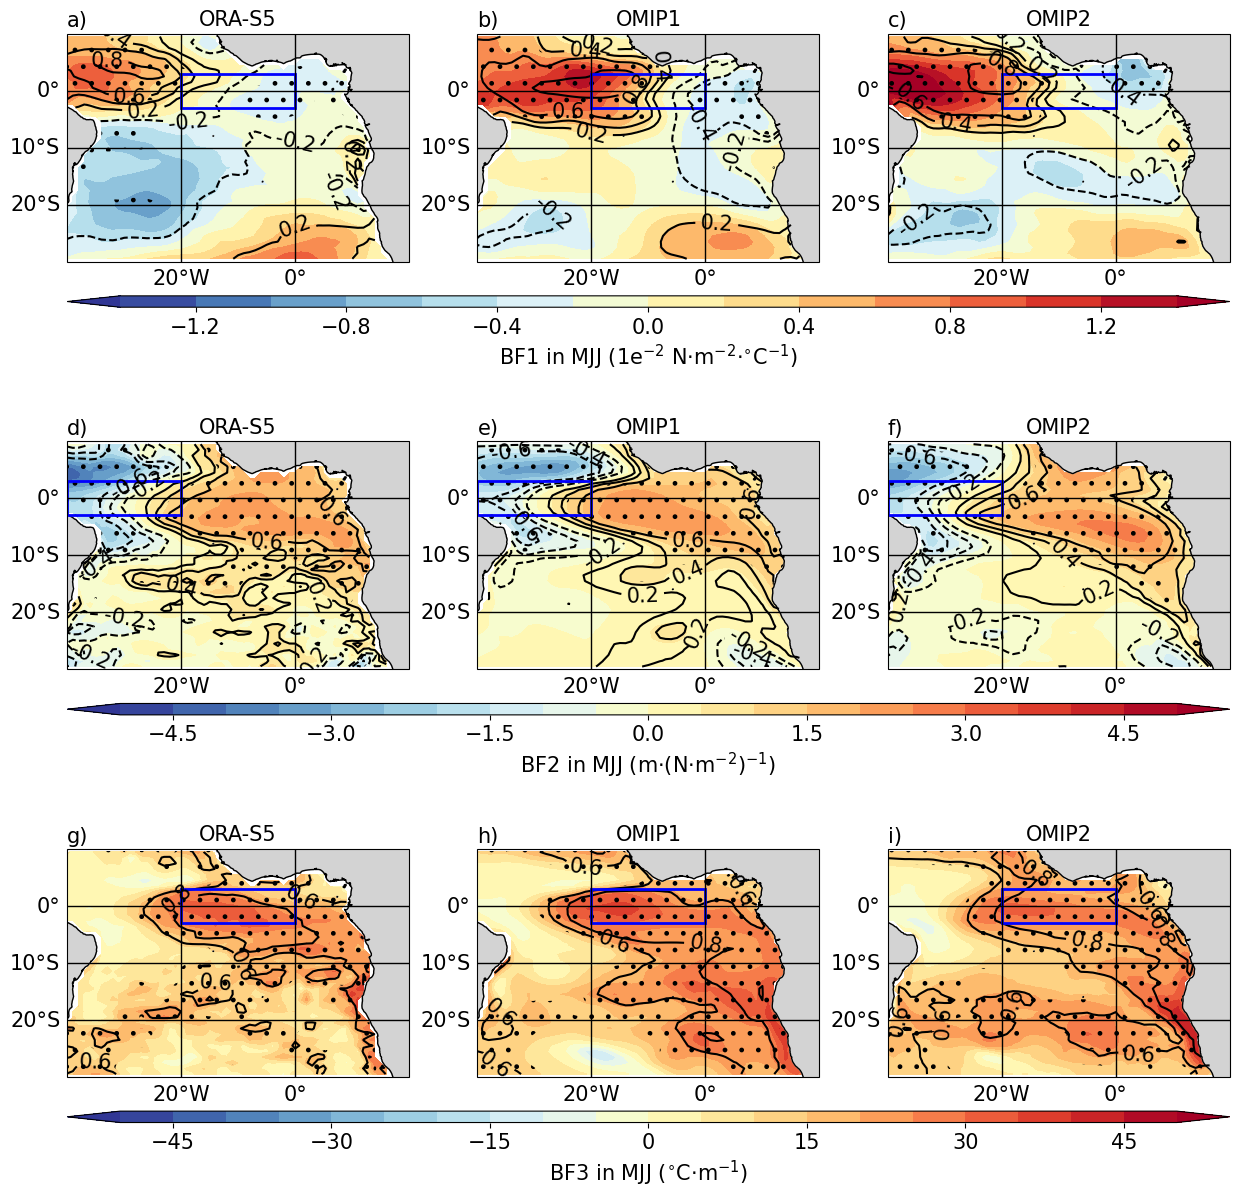

In [7]:
f,ax = plt.subplots(3,3,figsize=[15,15], subplot_kw={'projection': ccrs.PlateCarree()})
f.patch.set_facecolor('white')
cmap = plt.cm.RdYlBu_r
bounds_bf1 = np.arange(-1.4,1.6,0.2)
bounds_bf2 = np.arange(-5,5.5,0.5)

bounds_bf3 = np.arange(-50,55,5)
ftz=15
ax=ax.ravel()



cax0 = inset_axes(ax[0],
                 width='340%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.2,1,1),
                 bbox_transform=ax[0].transAxes,
                 borderpad=0)

cax3 = inset_axes(ax[3],
                 width='340%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.2,1,1),
                 bbox_transform=ax[3].transAxes,
                 borderpad=0)


cax6 = inset_axes(ax[6],
                 width='340%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.2,1,1),
                 bbox_transform=ax[6].transAxes,
                 borderpad=0)




p0=ax[0].contourf(bf1_oras5.lon,bf1_oras5.lat,bf1_oras5.alpha*100,cmap=cmap,
                  levels=bounds_bf1,extend='both',
               transform=ccrs.PlateCarree())

ax[0].contourf(bf1_oras5.lon,bf1_oras5.lat,bf1_oras5.pval,[0,0.05,1],hatches=['.',None],colors='none',
               transform=ccrs.PlateCarree())


cs1 = ax[0].contour(bf1_oras5.lon,bf1_oras5.lat,bf1_oras5.rval,colors='black',
                    levels=[-0.2,0.2,0.4,0.6,0.8],
               transform=ccrs.PlateCarree())
ax[0].clabel(cs1,inline=1,fmt='%1.1f',fontsize=ftz,colors='black')
gl = ax[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=1,
                  linestyle='-',zorder=2)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': ftz, 'color': 'black'}
gl.ylabel_style = {'size': ftz, 'color': 'black'}
gl.xlocator = mticker.FixedLocator([-40,-20,0,20])
gl.ylocator = mticker.FixedLocator([-20,-10,0,10])
ax[0].add_feature(cartopy.feature.COASTLINE,zorder=2)# add coastlines
ax[0].add_feature(cartopy.feature.LAND,edgecolor='black',color='lightgrey',zorder=1)# add coastlines
ax[0].set_xlim([-40,20])
ax[0].set_ylim([-30,10])
ax[0].set_title('ORA-S5',fontsize=ftz)

ax[0].add_patch(mpatches.Rectangle(xy=[-20,-3],
                                   width=20,
                                   height=6,
                                   edgecolor='blue',
                                   fill=None,
                                   alpha=1,linewidth=2,zorder=2))






p0=ax[1].contourf(bf1_omip1.lon,bf1_omip1.lat,bf1_omip1.alpha.mean(dim='model')*100,cmap=cmap,
                  levels=bounds_bf1,extend='both',
               transform=ccrs.PlateCarree())

ax[1].contourf(bf1_omip1.lon,bf1_omip1.lat,bf1_omip1.pval.mean(dim='model'),
               [0,0.05,1],hatches=['.',None],colors='none',
               transform=ccrs.PlateCarree())



cs1 = ax[1].contour(bf1_omip1.lon,bf1_omip1.lat,bf1_omip1.rval.mean(dim='model'),colors='black',
                    levels=[-0.4,-0.2,0.2,0.4,0.6,0.8],
               transform=ccrs.PlateCarree())
ax[1].clabel(cs1,inline=1,fmt='%1.1f',fontsize=ftz,colors='black')
gl = ax[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=1,
                  linestyle='-',zorder=2)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': ftz, 'color': 'black'}
gl.ylabel_style = {'size': ftz, 'color': 'black'}
gl.xlocator = mticker.FixedLocator([-40,-20,0,20])
gl.ylocator = mticker.FixedLocator([-20,-10,0,10])
ax[1].add_feature(cartopy.feature.COASTLINE,zorder=2)# add coastlines
ax[1].add_feature(cartopy.feature.LAND,edgecolor='black',color='lightgrey',zorder=1)# add coastlines
ax[1].set_xlim([-40,20])
ax[1].set_ylim([-30,10])
ax[1].set_title('OMIP1',fontsize=ftz)

ax[1].add_patch(mpatches.Rectangle(xy=[-20,-3],
                                   width=20,
                                   height=6,
                                   edgecolor='blue',
                                   fill=None,
                                   alpha=1,linewidth=2,zorder=2))

cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('BF1 in MJJ (1e$^{-2}$ N$\cdot$m$^{-2}$$\cdot$$^{\circ}$C$^{-1}$)',fontsize=ftz)






p0 = ax[2].contourf(bf1_omip2.lon,bf1_omip2.lat,bf1_omip2.alpha.mean(dim='model')*100,cmap=cmap,
                    levels=bounds_bf1,extend='both',
               transform=ccrs.PlateCarree())

ax[2].contourf(bf1_omip2.lon,bf1_omip2.lat,bf1_omip2.pval.mean(dim='model'),[0,0.05,1],hatches=['.',None],
               colors='none',
               transform=ccrs.PlateCarree())


cs2 = ax[2].contour(bf1_omip2.lon,bf1_omip2.lat,bf1_omip2.rval.mean(dim='model'),colors='black',
                    levels=[-0.4,-0.2,0.2,0.4,0.6,0.8],
               transform=ccrs.PlateCarree())
ax[2].clabel(cs2,inline=1,fmt='%1.1f',fontsize=ftz,colors='black')
gl = ax[2].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=1,
                  linestyle='-',zorder=2)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': ftz, 'color': 'black'}
gl.ylabel_style = {'size': ftz, 'color': 'black'}
gl.xlocator = mticker.FixedLocator([-40,-20,0,20])
gl.ylocator = mticker.FixedLocator([-20,-10,0,10])
ax[2].add_feature(cartopy.feature.COASTLINE,zorder=2)# add coastlines
ax[2].add_feature(cartopy.feature.LAND,edgecolor='black',color='lightgrey',zorder=1)# add coastlines
ax[2].set_xlim([-40,20])
ax[2].set_ylim([-30,10])
ax[2].set_title('OMIP2',fontsize=ftz)

ax[2].add_patch(mpatches.Rectangle(xy=[-20,-3],
                                   width=20,
                                   height=6,
                                   edgecolor='blue',
                                   fill=None,
                                   alpha=1,linewidth=2,zorder=2))





p4=ax[3].contourf(bf2_oras5.lon,bf2_oras5.lat,bf2_oras5.alpha,cmap=cmap,
                  levels=bounds_bf2,extend='both',
               transform=ccrs.PlateCarree())

ax[3].contourf(bf2_oras5.lon,bf2_oras5.lat,bf2_oras5.pval,[0,0.05,1],hatches=['.',None],
               colors='none',
               transform=ccrs.PlateCarree())


cs1 = ax[3].contour(bf2_oras5.lon,bf2_oras5.lat,bf2_oras5.rval,colors='black',
                    levels=[-0.6,-0.4,-0.2,0.2,0.4,0.6],
               transform=ccrs.PlateCarree())
ax[3].clabel(cs1,inline=1,fmt='%1.1f',fontsize=ftz,colors='black')
gl = ax[3].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=1,
                  linestyle='-',zorder=2)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': ftz, 'color': 'black'}
gl.ylabel_style = {'size': ftz, 'color': 'black'}
gl.xlocator = mticker.FixedLocator([-40,-20,0,20])
gl.ylocator = mticker.FixedLocator([-20,-10,0,10])
ax[3].add_feature(cartopy.feature.COASTLINE,zorder=2)# add coastlines
ax[3].add_feature(cartopy.feature.LAND,edgecolor='black',color='lightgrey',zorder=1)# add coastlines
ax[3].set_xlim([-40,20])
ax[3].set_ylim([-30,10])
ax[3].set_title('ORA-S5',fontsize=ftz)

ax[3].add_patch(mpatches.Rectangle(xy=[-40,-3],
                                   width=20,
                                   height=6,
                                   edgecolor='blue',
                                   fill=None,
                                   alpha=1,linewidth=2,zorder=2))





p4=ax[4].contourf(bf2_omip1.lon,bf2_omip1.lat,bf2_omip1.alpha.mean(dim='model'),cmap=cmap,
                  levels=bounds_bf2,extend='both')

ax[4].contourf(bf2_omip1.lon,bf2_omip1.lat,bf2_omip1.pval.mean(dim='model'),[0,0.05,1],hatches=['.',None],
               colors='none',
               transform=ccrs.PlateCarree())

cs1 = ax[4].contour(bf2_omip1.lon,bf2_omip1.lat,bf2_omip1.rval.mean(dim='model'),colors='black',
                    levels=[-0.6,-0.4,-0.2,0.2,0.4,0.6])
ax[4].clabel(cs1,inline=1,fmt='%1.1f',fontsize=ftz,colors='black')
gl = ax[4].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=1,
                  linestyle='-',zorder=2)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': ftz, 'color': 'black'}
gl.ylabel_style = {'size': ftz, 'color': 'black'}
gl.xlocator = mticker.FixedLocator([-40,-20,0,20])
gl.ylocator = mticker.FixedLocator([-20,-10,0,10])
ax[4].add_feature(cartopy.feature.COASTLINE,zorder=2)# add coastlines
ax[4].add_feature(cartopy.feature.LAND,edgecolor='black',color='lightgrey',zorder=1)# add coastlines
ax[4].set_xlim([-40,20])
ax[4].set_ylim([-30,10])
ax[4].set_title('OMIP1',fontsize=ftz)

ax[4].add_patch(mpatches.Rectangle(xy=[-40,-3],
                                   width=20,
                                   height=6,
                                   edgecolor='blue',
                                   fill=None,
                                   alpha=1,linewidth=2,zorder=2))

cbar = plt.colorbar(p4,cax3,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('BF2 in MJJ (m$\cdot$(N$\cdot$m$^{-2}$)$^{-1}$)',fontsize=ftz)



p4=ax[5].contourf(bf2_omip2.lon,bf2_omip2.lat,bf2_omip2.alpha.mean(dim='model'),cmap=cmap,
                  levels=bounds_bf2,extend='both')
ax[5].contourf(bf2_omip2.lon,bf2_omip2.lat,bf2_omip2.pval.mean(dim='model'),[0,0.05,1],hatches=['.',None],
               colors='none',
               transform=ccrs.PlateCarree())

cs1 = ax[5].contour(bf2_omip2.lon,bf2_omip2.lat,bf2_omip2.rval.mean(dim='model'),colors='black',
                    levels=[-0.6,-0.4,-0.2,0.2,0.4,0.6])
ax[5].clabel(cs1,inline=1,fmt='%1.1f',fontsize=ftz,colors='black')
gl = ax[5].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=1,
                  linestyle='-',zorder=2)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': ftz, 'color': 'black'}
gl.ylabel_style = {'size': ftz, 'color': 'black'}
gl.xlocator = mticker.FixedLocator([-40,-20,0,20])
gl.ylocator = mticker.FixedLocator([-20,-10,0,10])
ax[5].add_feature(cartopy.feature.COASTLINE,zorder=2)# add coastlines
ax[5].add_feature(cartopy.feature.LAND,edgecolor='black',color='lightgrey',zorder=1)# add coastlines
ax[5].set_xlim([-40,20])
ax[5].set_ylim([-30,10])
ax[5].set_title('OMIP2',fontsize=ftz)

ax[5].add_patch(mpatches.Rectangle(xy=[-40,-3],
                                   width=20,
                                   height=6,
                                   edgecolor='blue',
                                   fill=None,
                                   alpha=1,linewidth=2,zorder=2))



ax[6].contourf(bf3_oras5.lon,bf3_oras5.lat,bf3_oras5.alpha,cmap=cmap,
                  levels=bounds_bf3,extend='both',
               transform=ccrs.PlateCarree())


ax[6].contourf(bf3_oras5.lon,bf3_oras5.lat,bf3_oras5.pval,[0,0.05,1],hatches=['.',None],
               colors='none',
               transform=ccrs.PlateCarree())

cs1 = ax[6].contour(bf3_oras5.lon,bf3_oras5.lat,bf3_oras5.rval,colors='black',
                    levels=[-0.8,-0.6,0.6,0.8],
               transform=ccrs.PlateCarree())
ax[6].clabel(cs1,inline=1,fmt='%1.1f',fontsize=ftz,colors='black')
gl = ax[6].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=1,
                  linestyle='-',zorder=2)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': ftz, 'color': 'black'}
gl.ylabel_style = {'size': ftz, 'color': 'black'}
gl.xlocator = mticker.FixedLocator([-40,-20,0,20])
gl.ylocator = mticker.FixedLocator([-20,-10,0,10])
ax[6].add_feature(cartopy.feature.COASTLINE,zorder=2)# add coastlines
ax[6].add_feature(cartopy.feature.LAND,edgecolor='black',color='lightgrey',zorder=1)# add coastlines
ax[6].set_xlim([-40,20])
ax[6].set_ylim([-30,10])
ax[6].set_title('ORA-S5',fontsize=ftz)
ax[6].add_patch(mpatches.Rectangle(xy=[-20,-3],
                                   width=20,
                                   height=6,
                                   edgecolor='blue',
                                   fill=None,
                                   alpha=1,linewidth=2,zorder=2))





p7=ax[7].contourf(bf3_omip1.lon,bf3_omip1.lat,bf3_omip1.alpha.mean(dim='model'),cmap=cmap,
                  levels=bounds_bf3,extend='both',
               transform=ccrs.PlateCarree())

ax[7].contourf(bf3_omip1.lon,bf3_omip1.lat,bf3_omip1.pval.mean(dim='model'),[0,0.05,1],hatches=['.',None],
               colors='none',
               transform=ccrs.PlateCarree())

cs1 = ax[7].contour(bf3_omip1.lon,bf3_omip1.lat,bf3_omip1.rval.mean(dim='model'),colors='black',
                    levels=[-0.8,-0.6,0.6,0.8],
               transform=ccrs.PlateCarree())

ax[7].clabel(cs1,inline=1,fmt='%1.1f',fontsize=ftz,colors='black')
gl = ax[7].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=1,
                  linestyle='-',zorder=2)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': ftz, 'color': 'black'}
gl.ylabel_style = {'size': ftz, 'color': 'black'}
gl.xlocator = mticker.FixedLocator([-40,-20,0,20])
gl.ylocator = mticker.FixedLocator([-20,-10,0,10])
ax[7].add_feature(cartopy.feature.COASTLINE,zorder=2)# add coastlines
ax[7].add_feature(cartopy.feature.LAND,edgecolor='black',color='lightgrey',zorder=1)# add coastlines
ax[7].set_xlim([-40,20])
ax[7].set_ylim([-30,10])
ax[7].set_title('OMIP1',fontsize=ftz)
ax[7].add_patch(mpatches.Rectangle(xy=[-20,-3],
                                   width=20,
                                   height=6,
                                   edgecolor='blue',
                                   fill=None,
                                   alpha=1,linewidth=2,zorder=2))

cbar = plt.colorbar(p7,cax6,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('BF3 in MJJ ($^{\circ}$C$\cdot$m$^{-1}$)',fontsize=ftz)



p7=ax[8].contourf(bf3_omip2.lon,bf3_omip2.lat,bf3_omip2.alpha.mean(dim='model'),cmap=cmap,
                  levels=bounds_bf3,extend='both')

ax[8].contourf(bf3_omip2.lon,bf3_omip2.lat,bf3_omip2.pval.mean(dim='model'),[0,0.05,1],hatches=['.',None],
               colors='none',
               transform=ccrs.PlateCarree())

cs1 = ax[8].contour(bf3_omip2.lon,bf3_omip2.lat,bf3_omip2.rval.mean(dim='model'),colors='black',
                    levels=[-0.8,-0.6,0.6,0.8])
ax[8].clabel(cs1,inline=1,fmt='%1.1f',fontsize=ftz,colors='black')
gl = ax[8].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=1,
                  linestyle='-',zorder=2)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': ftz, 'color': 'black'}
gl.ylabel_style = {'size': ftz, 'color': 'black'}
gl.xlocator = mticker.FixedLocator([-40,-20,0,20])
gl.ylocator = mticker.FixedLocator([-20,-10,0,10])
ax[8].add_feature(cartopy.feature.COASTLINE,zorder=2)# add coastlines
ax[8].add_feature(cartopy.feature.LAND,edgecolor='black',color='lightgrey',zorder=1)# add coastlines
ax[8].set_xlim([-40,20])
ax[8].set_ylim([-30,10])
ax[8].set_title('OMIP2',fontsize=ftz)
ax[8].add_patch(mpatches.Rectangle(xy=[-20,-3],
                                   width=20,
                                   height=6,
                                   edgecolor='blue',
                                   fill=None,
                                   alpha=1,linewidth=2,zorder=2))




ax[0].text(0,1.03,'a)',transform=ax[0].transAxes,size=ftz)
ax[1].text(0,1.03,'b)',transform=ax[1].transAxes,size=ftz)
ax[2].text(0,1.03,'c)',transform=ax[2].transAxes,size=ftz)


ax[3].text(0,1.03,'d)',transform=ax[3].transAxes,size=ftz)
ax[4].text(0,1.03,'e)',transform=ax[4].transAxes,size=ftz)
ax[5].text(0,1.03,'f)',transform=ax[5].transAxes,size=ftz)


ax[6].text(0,1.03,'g)',transform=ax[6].transAxes,size=ftz)
ax[7].text(0,1.03,'h)',transform=ax[7].transAxes,size=ftz)
ax[8].text(0,1.03,'i)',transform=ax[8].transAxes,size=ftz)

#plt.savefig(path_fig+'figure_03_new_mjj.png',bbox_inches='tight',dpi=300)